In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import sweetviz
import folium
import geopandas
from geopy.distance import geodesic
from datetime import datetime

In [4]:
data = pd.read_csv('../../../Desktop/SamX/Bike_Study_Files/big_raw.csv')
data.shape

(5733451, 13)

In [5]:
# Convert 'started_at' and 'ended_at' to datetime objects
data['started_at'] = pd.to_datetime(data['started_at'])
data['ended_at'] = pd.to_datetime(data['ended_at'])

# Calculate ride duration in minutes
data['ride_duration'] = (data['ended_at'] - data['started_at']).dt.total_seconds() / 60

# Additional columns for temporal analysis
data['start_date'] = data['started_at'].dt.date
data['start_hour'] = data['started_at'].dt.hour
data['day_of_week'] = data['started_at'].dt.day_name()
data['week_of_year'] = data['started_at'].dt.isocalendar().week

# Preview the data with new columns
data[['ride_id', 'rideable_type', 'member_casual', 'started_at', 'ended_at', 'ride_duration', 'start_date', 'start_hour', 'day_of_week', 'week_of_year']].head()

,ride_id,rideable_type,member_casual,started_at,ended_at,ride_duration,start_date,start_hour,day_of_week,week_of_year
0,46F8167220E4431F,electric_bike,member,2021-12-07 15:06:07,2021-12-07 15:13:42,7.583333,2021-12-07,15,Tuesday,49
1,73A77762838B32FD,electric_bike,casual,2021-12-11 03:43:29,2021-12-11 04:10:23,26.900000,2021-12-11,3,Saturday,49
2,4CF42452054F59C5,electric_bike,member,2021-12-15 23:10:28,2021-12-15 23:23:14,12.766667,2021-12-15,23,Wednesday,50
3,3278BA87BF698339,classic_bike,member,2021-12-26 16:16:10,2021-12-26 16:30:53,14.716667,2021-12-26,16,Sunday,51
4,6FF54232576A3B73,electric_bike,member,2021-12-30 11:31:05,2021-12-30 11:51:21,20.266667,2021-12-30,11,Thursday,52


In [6]:
data1 = data

#### Note:
For the purposes of this analysis, I do not need to be crunching through all 5 million rows of data. A sample of 50,000 is more than enough, and possibly too much for the heatmapping functions. I may need to tweak the parameters of the heatmap, or further restrict the sample size later down the road

In [7]:
data = data1.sample(n=50000, replace=False, random_state=42)
data.shape

(50000, 18)

In [ ]:
data.shape

In [ ]:
data.rideable_type.value_counts()

In [ ]:
data2 = data[data.rideable_type != 'docked_bike']
data2.shape

In [ ]:
custom_colors = {'electric_bike': '#20639b', 'classic_bike': '#fdb863'}


# Basic statistics for ride duration for each user type and rideable type
duration_stats = data2.groupby(['member_casual', 'rideable_type']).ride_duration.agg(['mean', 'median', 'count']).reset_index()

# Plotting
plt.figure(figsize=(12, 6))

# Ride counts by user type and rideable type
plt.subplot(1, 2, 1)
sns.countplot(data=data2, x='member_casual', hue='rideable_type', palette=custom_colors)
plt.title('Ride Counts by User Type and Rideable Type')
plt.xlabel('User Type')
plt.ylabel('Ride Count')
plt.legend(title='Rideable Type', labels=['Electric Bike', 'Classic Bike'])


# Average ride duration by user type and rideable type
plt.subplot(1, 2, 2)
sns.barplot(data=duration_stats, x='member_casual', y='mean', hue='rideable_type', palette=custom_colors)
plt.title('Average Ride Duration by User Type and Rideable Type')
plt.xlabel('User Type')
plt.ylabel('Average Duration (minutes)')
#plt.legend(title='Rideable Type', labels=['Electric Bike', 'Classic Bike'])

plt.tight_layout()
plt.show()

duration_stats



In [ ]:
duration_stats.columns

In [ ]:
11135/(11135+7896)

## Distribution of rides through the year

In [8]:
df = data1

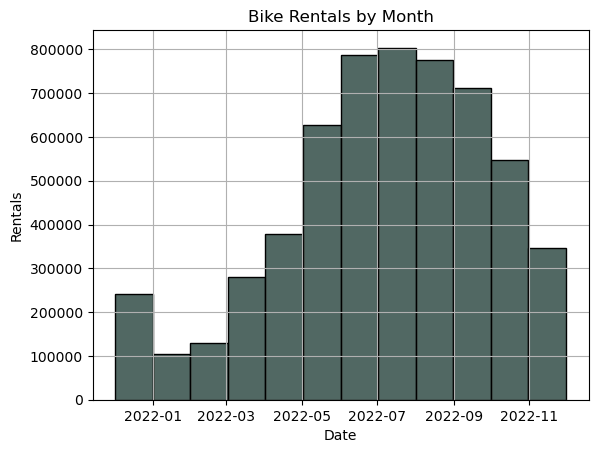

(2346876, 18)
(3386575, 18)


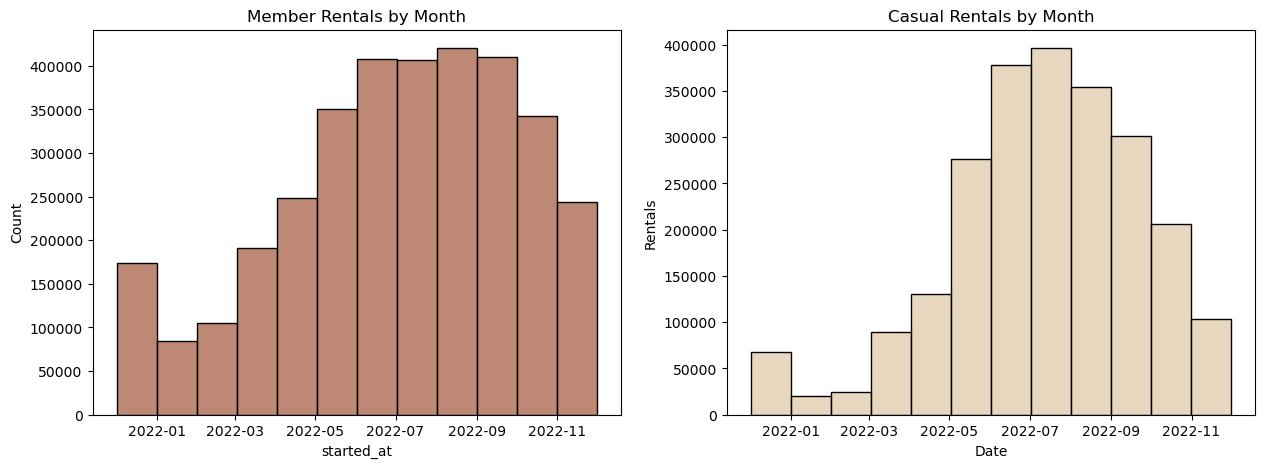

In [9]:
df['started_at'].hist(bins=12)

sns.histplot(df['started_at'], bins=12, kde=False, color='#636348')

plt.xlabel("Date")
plt.ylabel("Rentals")
plt.title("Bike Rentals by Month")
plt.show()


grouped = df.groupby(df['member_casual'])

casual = grouped.get_group('casual')
members = grouped.get_group('member')

print(casual.shape)
print(members.shape)

fig, ax = plt.subplots(1, 2, figsize=(15,5))

sns.histplot(members['started_at'], bins=12, kde=False, color='#a76046', ax=ax[0])
ax[0].set_title('Member Rentals by Month')

sns.histplot(casual['started_at'], bins=12, kde=False, color='#e0caa9', ax=ax[1])
ax[1].set_title('Casual Rentals by Month')

plt.xlabel("Date")
plt.ylabel("Rentals")
#plt.title("Bike Rentals by Month")
plt.show()

In [13]:
casual_months = casual['started_at'].dt.month_name()
member_months = members['started_at'].dt.month_name()

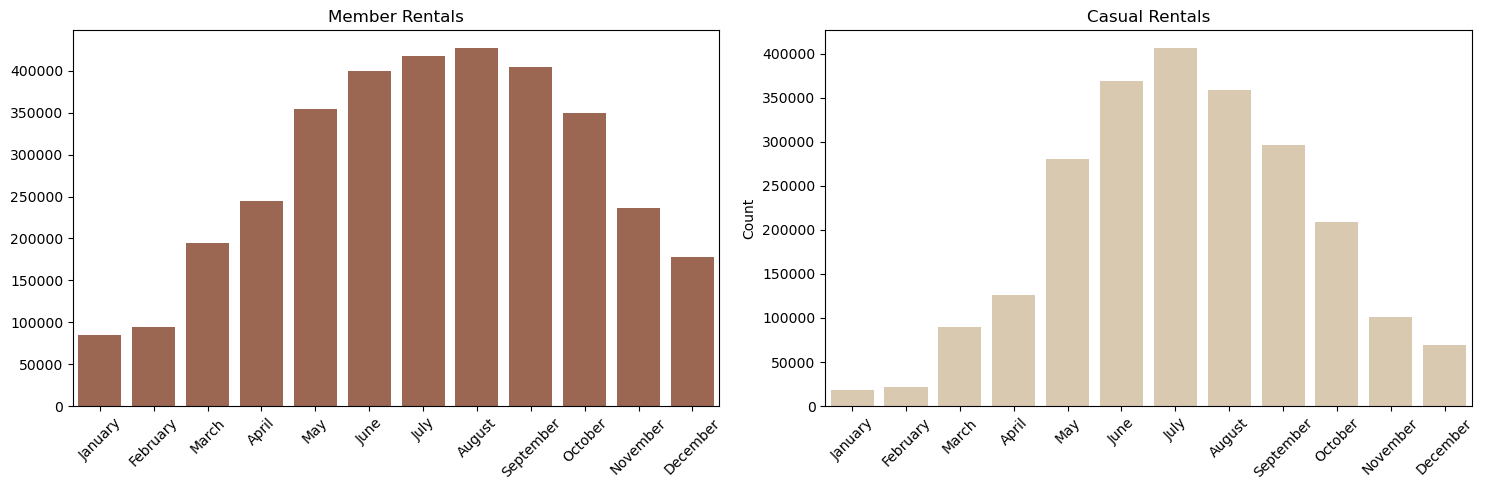

In [14]:
c_months = casual_months.value_counts()
m_months = member_months.value_counts()

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
             'July', 'August', 'September', 'October', 'November', 'December']

fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.barplot(x=m_months.index, y=m_months.values, color='#a76046', order=month_order, ax=axes[0])
axes[0].set_title('Member Rentals')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)  # Rotate x-axis labels for the first subplot


sns.barplot(x=c_months.index, y=c_months.values, order=month_order, color='#e0caa9', ax=axes[1])
axes[1].set_title('Casual Rentals')

#plt.xlabel("Day of the Week")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
july = data1[data1['started_at'].dt.month_name() == 'July']
july.shape

(823488, 18)

In [16]:
jan = data1[data1['started_at'].dt.month_name() == 'January']
jan.shape

(103770, 18)

## Distribution of rides through the week

In [ ]:
casual_days = casual['started_at'].dt.day_name()
member_days = members['started_at'].dt.day_name()

c_days = casual_days.value_counts()
m_days = member_days.value_counts()

day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.barplot(x=m_days.index, y=m_days.values, color='#a76046', order=day_order, ax=axes[0])
axes[0].set_title('Member Rentals')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)  # Rotate x-axis labels for the first subplot


sns.barplot(x=c_days.index, y=c_days.values, order=day_order, color='#e0caa9', ax=axes[1])
axes[1].set_title('Casual Rentals')

#plt.xlabel("Day of the Week")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
all_days = df['started_at'].dt.day_name().value_counts()

day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

sns.barplot(x=all_days.index, y=all_days.values, color='#636348', order=day_order)

plt.title('All Rentals')
#plt.xlabel("Day of the Week")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Just July...

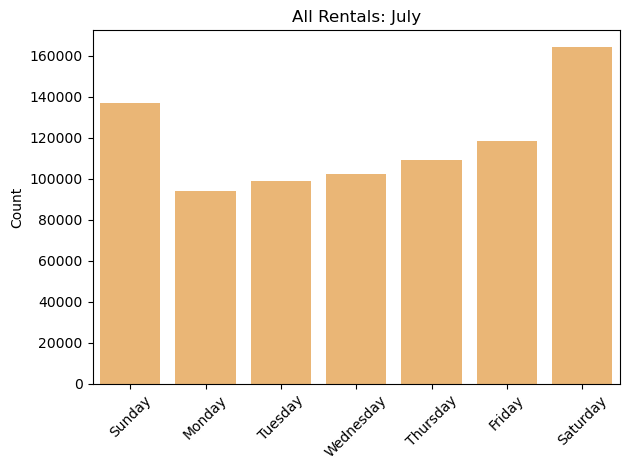

In [19]:
all_days = july['started_at'].dt.day_name().value_counts()

day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

sns.barplot(x=all_days.index, y=all_days.values, color='#fdb863', order=day_order)

plt.title('All Rentals: July')
#plt.xlabel("Day of the Week")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Just January...

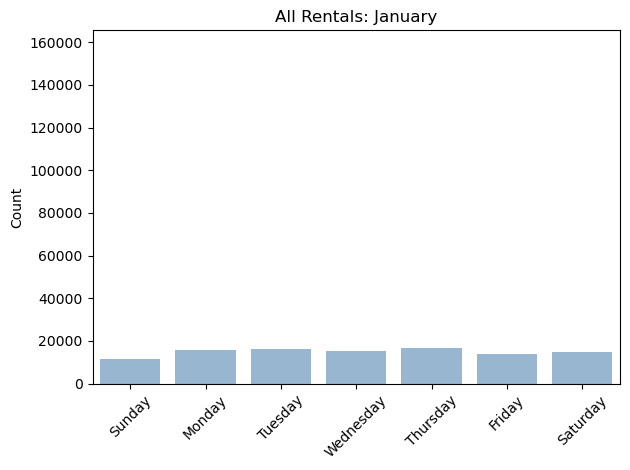

In [22]:
all_days = jan['started_at'].dt.day_name().value_counts()

day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

sns.barplot(x=all_days.index, y=all_days.values, color='#90b6da', order=day_order)

plt.title('All Rentals: January')
#plt.xlabel("Day of the Week")
plt.ylabel("Count")
plt.xticks(rotation=45)

# Get the current maximum y-value and set new y-limits
current_max_y = all_days.max()
plt.ylim(0, current_max_y * 10)

plt.tight_layout()
plt.show()